In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))

In [2]:
df = pd.read_csv(r'Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [10]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

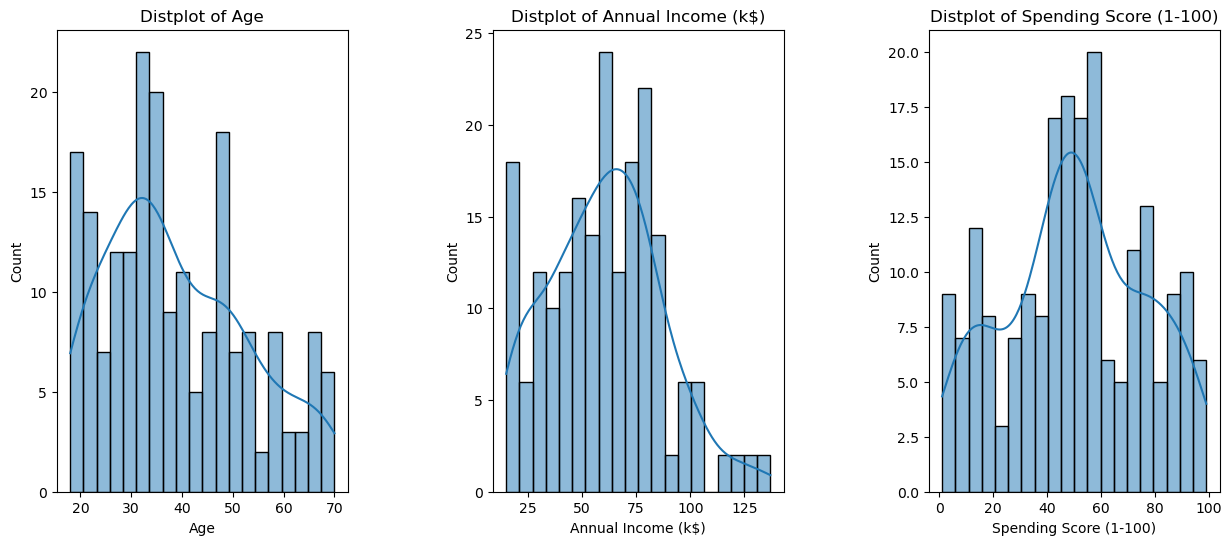

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))

# Iterate over the columns and create subplots
for i, column in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[column], bins=20, kde=True)  # Using histplot instead of distplot
    plt.title(f'Distplot of {column}')

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()


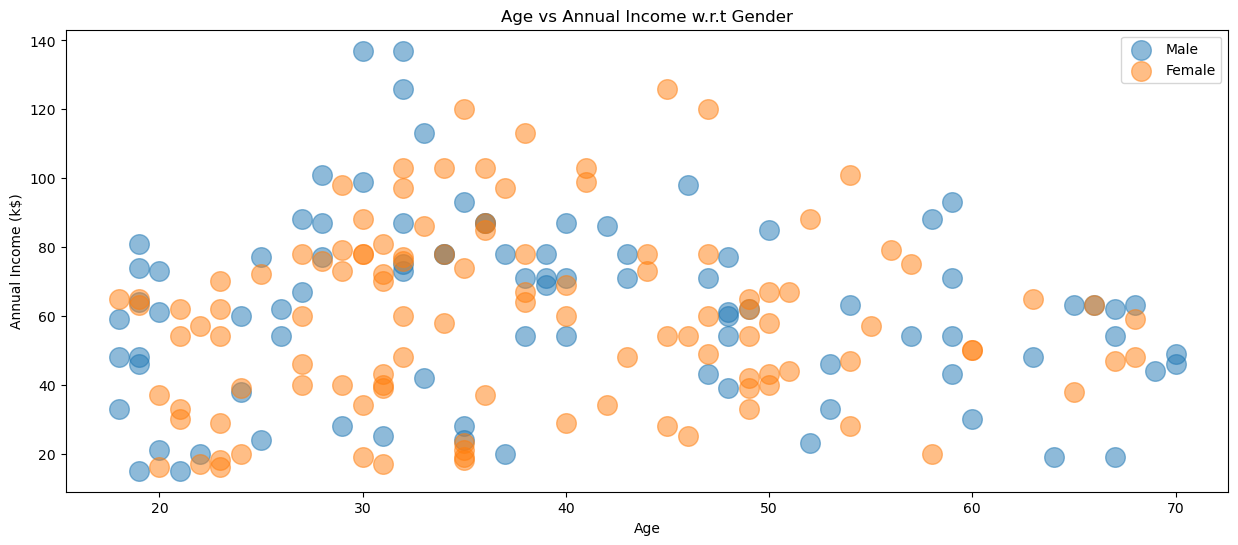

In [13]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

Silhouette Score: 0.5546571631111091


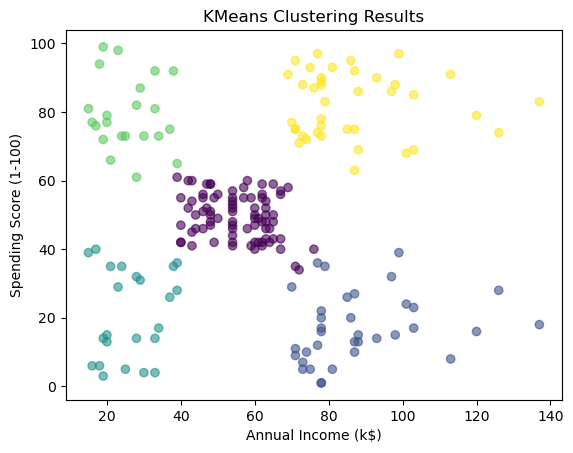

In [18]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the given data
data = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Choose the number of clusters (you may need to adjust this based on your analysis)
num_clusters = 5

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Calculate silhouette score
silhouette_avg = silhouette_score(scaled_data, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Visualize the clusters
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.title('KMeans Clustering Results')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()
